In [1]:
!pwd

/Users/dtimke/Desktop/machine learning project


In [2]:
import os
import librosa
import pandas as pd
import json 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio

import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint


from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import os
import pickle
import random 
import operator
import math
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import PIL
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential, activations
import os, glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
import scipy.spatial.distance
import optparse
import json
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
import math

from tensorflow import keras
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import cosine
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional, Lambda
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import OrderedDict
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

seed = 12
np.random.seed(seed)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

%matplotlib inline

#### What is the data?

1. CSV of features for 30s samples of songs from various genres
2. CSV of features for 3s samples of songs from various genres
3. 30s samples of various genres
4. Images of spectrograms for each sample

#### What can we do with these?

Baseline model with KNN or RandomForestClassifier based on csv 30s file
Baseline model with KNN or Random Forest based on csv 3s

CNN for images
VAE?

## Baseline model with 30s

In [4]:
thirty_sec_df = pd.read_csv('data/features_30_sec.csv')
thirty_sec_df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
X = thirty_sec_df.drop(columns=['filename','label'])
y = thirty_sec_df.label

In [6]:
encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=666, test_size=.3, shuffle=True)

In [8]:
print(thirty_sec_df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 60)
(700, 58)
(300, 58)
(700, 10)
(300, 10)


In [9]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


baseline = KNeighborsClassifier()
baseline.fit(X_train_scaled, y_train);

In [11]:
ypred1 = baseline.predict(X_test_scaled)
ypred1_train = baseline.predict(X_train_scaled)

In [12]:
print('train accuracy:', accuracy_score(y_train,ypred1_train))
print('test accuracy:', accuracy_score(y_test,ypred1))

train accuracy: 0.7
test accuracy: 0.5466666666666666


### Random Forest baseline

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
baseline2 = RandomForestClassifier()

In [15]:
baseline2.fit(X_train,y_train)

ypred2 = baseline2.predict(X_test)
ypred2_train = baseline2.predict(X_train)

print('train accuracy:', accuracy_score(y_train,ypred2_train))
print('test accuracy:', accuracy_score(y_test,ypred2))

train accuracy: 0.9985714285714286
test accuracy: 0.38333333333333336


In [16]:
X_train.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
42,661794,0.377538,0.092428,0.111001,0.000527,2301.609667,2.051984e+05,2367.518781,47313.158909,5187.578454,...,10.235481,81.953705,-4.078413,67.334839,-5.850137,95.960312,-2.477926,164.219696,6.646699,108.991432
736,661504,0.394504,0.089450,0.256780,0.007180,2944.261533,1.255093e+06,3162.398744,213944.388194,6877.943226,...,1.804510,50.292980,0.380698,65.390732,-1.109121,76.995720,-0.426517,75.430069,1.564366,71.960892
389,661504,0.429718,0.078040,0.100383,0.001008,2128.799105,3.265166e+05,2108.702277,157575.946094,4422.758381,...,3.661765,37.103962,-10.320134,38.430061,0.578404,42.151382,-4.155168,62.974834,3.483316,61.356331
743,661504,0.473502,0.080579,0.254404,0.004969,2702.893002,1.133988e+06,2725.880646,228772.270841,5775.478198,...,1.418405,53.962646,1.069298,42.468853,1.906279,41.177200,2.270388,52.771935,2.421300,55.041618
224,661794,0.270354,0.090693,0.096582,0.001676,1738.888674,5.721533e+05,1907.255937,159289.762486,3424.861786,...,-8.530999,54.152889,-8.455587,42.346893,-7.922387,58.043636,-7.594036,53.281734,-0.390801,55.394527


In [17]:
#baseline2.feature_importances

KNN looks like a slightly better baeline model. Random Forest seems to overfit the training set pretty quickly and since this project is supposed to be focused on deep learning and not how good our baseline is - I will leave these alone for now. 

If it makes sense to revist these simpler models after the deep learning portion, perhaps we shall.

## Create training, validation, and test sets of spectrograms included with dataset

In [18]:
img_path = 'Data/images_original/'

In [19]:
BATCH_SIZE=8
TARGET_SIZE=224 # Based on EfficientNetB0
NUM_CLASSES=10

In [20]:
train_ds = image_dataset_from_directory(
  img_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(TARGET_SIZE, TARGET_SIZE),
  batch_size=BATCH_SIZE)

Found 999 files belonging to 10 classes.
Using 800 files for training.


In [21]:
val_ds = image_dataset_from_directory(
    img_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=BATCH_SIZE)

Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [22]:
class_names = train_ds.class_names

In [23]:
class_names

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [74]:
train_datagen = ImageDataGenerator(rescale = 1./255)# input_shape=(244,244,3))
test_datagen = ImageDataGenerator(rescale = 1./255)# input_shape=(244,244,3))
validation_datagen = ImageDataGenerator(rescale = 1./255)# input_shape=(244,244,3))


path_3s = 'Data/spectrograms3sec/train/'
path_30s = 'Data/images_original/'
path_valid_30s = 'Data/images_original_validation/'
path_test_3s = 'Data/spectrograms3sec/test/'
path_test_30s = 'Data/images_original_test/'


target_size = (244,244)
batch_size = 64
class_mode = 'categorical'

train_generator_3s = train_datagen.flow_from_directory(directory=path_3s, target_size=target_size,
                                                    batch_size=batch_size, class_mode=class_mode)

train_generator_30s = train_datagen.flow_from_directory(directory=path_30s, target_size=target_size,
                                                    batch_size=batch_size, class_mode=class_mode)

validation_generator_30s = validation_datagen.flow_from_directory(directory=path_valid_30s, target_size=target_size,
                                                         batch_size=batch_size,class_mode=class_mode)

test_generator_3s = test_datagen.flow_from_directory(directory=path_test_3s, target_size=target_size,
                                                         batch_size=batch_size,class_mode=class_mode)

test_generator_30s = test_datagen.flow_from_directory(directory=path_test_30s, target_size=target_size,
                                                         batch_size=batch_size,class_mode=class_mode)



Found 0 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 151 images belonging to 10 classes.
Found 80 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


# Baseline - two fully connected layers

First - just use the numerical data from the CSV files. This can serve as a baseline.

In [75]:
dense0 = Sequential()

In [76]:
dense0.add(tf.keras.layers.Dense(512, activation='relu'))
dense0.add(tf.keras.layers.Dense(10,activation='softmax'))

In [77]:
dense0.compile(optimizer='adam',
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=tf.keras.metrics.CategoricalAccuracy())

In [78]:
densetext=Sequential()
densetext.add(tf.keras.layers.Dense(1024,activation='relu'))
densetext.add(tf.keras.layers.Dense(512, activation='relu'))
#densetext.add(layers.Dropout(0.01))
densetext.add(tf.keras.layers.Dense(256, activation='relu'))
#densetext.add(layers.Dropout(0.01))
densetext.add(tf.keras.layers.Dense(128, activation='relu'))
#densetext.add(layers.Dropout(0.01))
densetext.add(tf.keras.layers.Dense(64, activation='relu'))
densetext.add(tf.keras.layers.Dense(10, activation='softmax'))

In [79]:
densetext.compile(optimizer='adam',loss='categorical_crossentropy', metrics='categorical_accuracy')

In [1]:
#historytext = densetext.fit(X_train,y_train, validation_split=0.2, batch_size=32, epochs=40)

In [2]:
#history0 = dense0.fit(X_train,y_train, validation_split=0.2, batch_size=32, epochs=100)

In [94]:
dense2_30 = Sequential()

In [95]:
dense2_30.add(layers.Flatten())
dense2_30.add(layers.Dense(1024, activation='relu'))
dense2_30.add(layers.Dense(512, activation='relu'))
dense2_30.add(layers.Dense(256, activation='relu'))
dense2_30.add(layers.Dense(128, activation='relu'))
dense2_30.add(layers.Dense(64,activation='relu'))
dense2_30.add(layers.Dense(10, activation='softmax'))

In [96]:
dense2_30.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=tf.keras.metrics.CategoricalAccuracy())



In [97]:
history = dense2_30.fit(train_generator_30s, validation_data= validation_generator_30s, epochs=50)

Epoch 1/50
16/16 [==============================] - 11s 593ms/step - loss: 52.9980 - categorical_accuracy: 0.0981 - val_loss: 22.2882 - val_categorical_accuracy: 0.0993
Epoch 2/50
16/16 [==============================] - 9s 563ms/step - loss: 22.8523 - categorical_accuracy: 0.1241 - val_loss: 19.0288 - val_categorical_accuracy: 0.1921
Epoch 3/50
16/16 [==============================] - 9s 567ms/step - loss: 11.4100 - categorical_accuracy: 0.1111 - val_loss: 4.8170 - val_categorical_accuracy: 0.1192
Epoch 4/50
16/16 [==============================] - 9s 570ms/step - loss: 3.7476 - categorical_accuracy: 0.1451 - val_loss: 2.6005 - val_categorical_accuracy: 0.2119
Epoch 5/50
16/16 [==============================] - 9s 575ms/step - loss: 2.3714 - categorical_accuracy: 0.1982 - val_loss: 2.3660 - val_categorical_accuracy: 0.2185
Epoch 6/50
16/16 [==============================] - 9s 569ms/step - loss: 2.2941 - categorical_accuracy: 0.2132 - val_loss: 1.9799 - val_categorical_accuracy: 0.225

16/16 [==============================] - 9s 569ms/step - loss: 0.1513 - categorical_accuracy: 0.9800 - val_loss: 0.0999 - val_categorical_accuracy: 1.0000


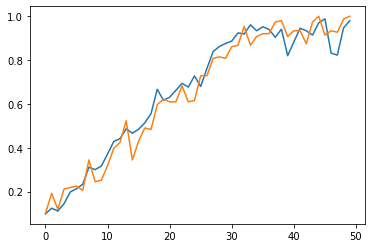

In [98]:
#omg it learns

plt.plot(history.history['categorical_accuracy']);
plt.plot(history.history['val_categorical_accuracy'])

In [99]:
dense2_30.evaluate(test_generator_30s)

4/4 [==============================] - 1s 188ms/step - loss: 0.1020 - categorical_accuracy: 1.0000


[0.10199406743049622, 1.0]

In [184]:
dense3_30=Sequential()

In [185]:
dense3_30=Sequential()
dense3_30.add(layers.Flatten())
dense3_30.add(layers.Dense(1024, activation='relu'))
dense3_30.add(layers.Dropout(0.01))
dense3_30.add(layers.Dense(512, activation='relu'))
dense3_30.add(layers.Dense(256, activation='relu'))
dense3_30.add(layers.Dropout(0.01))
dense3_30.add(layers.Dense(128, activation='relu'))
dense3_30.add(layers.Dense(64,activation='relu'))
dense3_30.add(layers.Dense(10, activation='softmax'))

In [186]:
dense3_30.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=tf.keras.metrics.CategoricalAccuracy())



In [187]:
history3_30 = dense3_30.fit(train_generator_30s, validation_data=validation_generator_30s, epochs=40)

Epoch 1/40
16/16 [==============================] - 11s 618ms/step - loss: 48.1438 - categorical_accuracy: 0.1241 - val_loss: 21.4986 - val_categorical_accuracy: 0.0795
Epoch 2/40
16/16 [==============================] - 10s 619ms/step - loss: 15.3189 - categorical_accuracy: 0.0921 - val_loss: 5.7984 - val_categorical_accuracy: 0.0993
Epoch 3/40
16/16 [==============================] - 11s 682ms/step - loss: 4.5202 - categorical_accuracy: 0.1181 - val_loss: 2.3257 - val_categorical_accuracy: 0.1258
Epoch 4/40
16/16 [==============================] - 11s 618ms/step - loss: 2.5995 - categorical_accuracy: 0.1491 - val_loss: 2.2525 - val_categorical_accuracy: 0.0861
Epoch 5/40
16/16 [==============================] - 10s 626ms/step - loss: 2.2468 - categorical_accuracy: 0.1902 - val_loss: 2.0230 - val_categorical_accuracy: 0.2252
Epoch 6/40
16/16 [==============================] - 11s 675ms/step - loss: 2.1653 - categorical_accuracy: 0.2232 - val_loss: 1.8791 - val_categorical_accuracy: 0.

In [188]:
dense3_30.evaluate(test_generator_30s)

4/4 [==============================] - 1s 193ms/step - loss: 0.2870 - categorical_accuracy: 0.9350


[0.28704291582107544, 0.9350000023841858]

In [193]:
dense3_30.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, None)              0         
                                                                 
 dense_89 (Dense)            (None, 1024)              182895616 
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_90 (Dense)            (None, 512)               524800    
                                                                 
 dense_91 (Dense)            (None, 256)               131328    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_92 (Dense)            (None, 128)             

In [111]:
history3_30

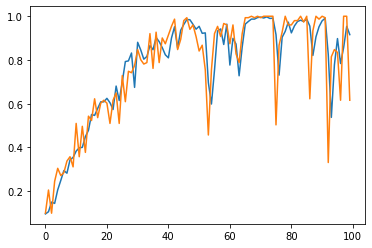

In [112]:
plt.plot(history3_30.history['categorical_accuracy']);
plt.plot(history3_30.history['val_categorical_accuracy']);

In [196]:
dense3_30.evaluate(test_generator_30s)

4/4 [==============================] - 1s 180ms/step - loss: 0.2870 - categorical_accuracy: 0.9350


[0.28704288601875305, 0.9350000023841858]

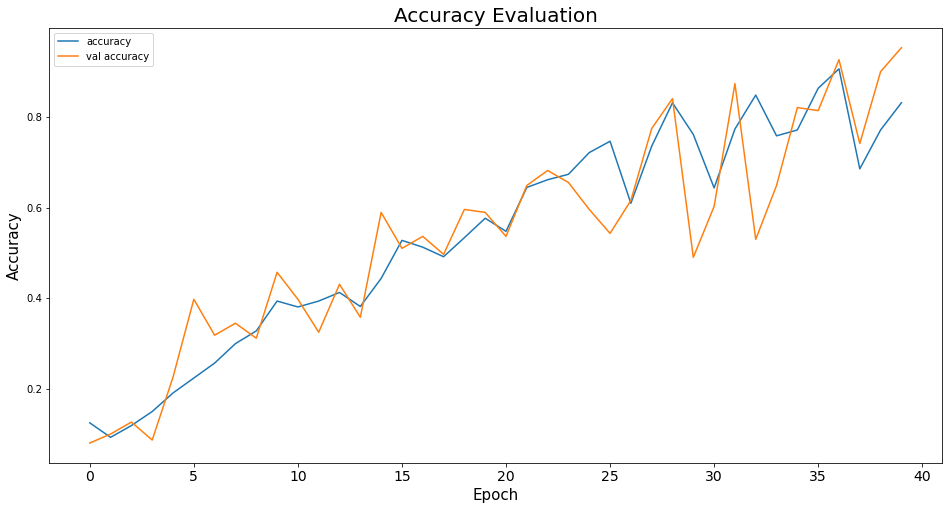

In [194]:
fig, ax = plt.subplots(figsize=(16, 8));

plt.title('Accuracy Evaluation', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Epoch", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.plot(history3_30.history['categorical_accuracy']);
plt.plot(history3_30.history['val_categorical_accuracy'])
plt.legend(labels=['accuracy', 'val accuracy']);
plt.savefig('hist3 30 acc eval.png')

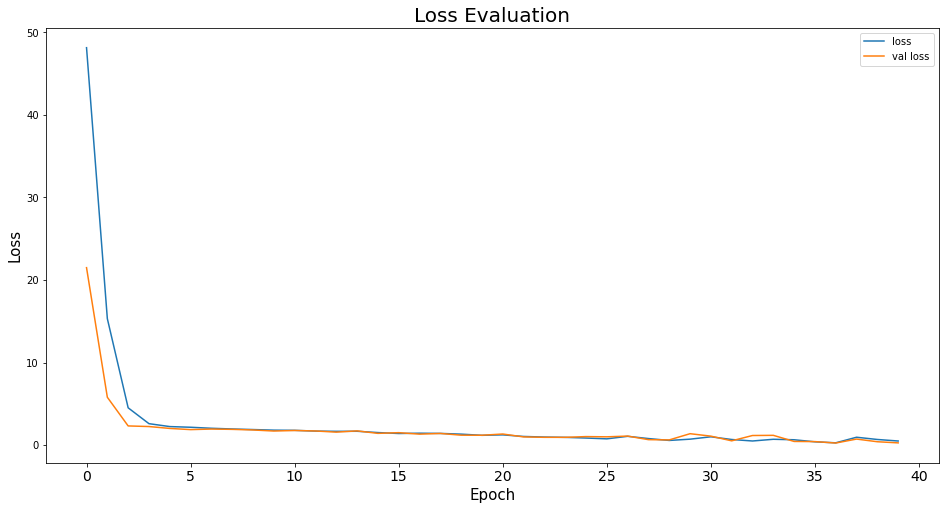

In [195]:
fig, ax = plt.subplots(figsize=(16, 8));

plt.title('Loss Evaluation', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Epoch", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.plot(history3_30.history['loss']);
plt.plot(history3_30.history['val_loss'])
plt.legend(labels=['loss','val loss'])
plt.savefig('loss eval.png')

In [136]:
dense_new = Sequential()

dense_new.add(layers.Flatten())
dense_new.add(layers.Dense(1024, activation='relu'))
dense_new.add(layers.Dropout(0.001))
dense_new.add(layers.Dense(512, activation='relu'))
dense_new.add(layers.Dropout(0.001))
dense_new.add(layers.Dense(256, activation='relu'))
dense_new.add(layers.Dense(128, activation='relu'))
dense_new.add(layers.Dense(10, activation='softmax'))

dense_new.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=tf.keras.metrics.CategoricalAccuracy())

In [138]:
csv_history = dense_new.fit(X_train, y_train, batch_size = 64,validation_split=0.2, epochs = 1000)

Epoch 1/1000
9/9 [==============================] - 1s 22ms/step - loss: 32091.1250 - categorical_accuracy: 0.1250 - val_loss: 7481.4243 - val_categorical_accuracy: 0.1786
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 7248.7437 - categorical_accuracy: 0.1554 - val_loss: 5306.9468 - val_categorical_accuracy: 0.1714
Epoch 3/1000
9/9 [==============================] - 0s 11ms/step - loss: 5067.3906 - categorical_accuracy: 0.2339 - val_loss: 3977.2732 - val_categorical_accuracy: 0.2286
Epoch 4/1000
9/9 [==============================] - 0s 11ms/step - loss: 4539.3350 - categorical_accuracy: 0.2625 - val_loss: 3745.5581 - val_categorical_accuracy: 0.1643
Epoch 5/1000
9/9 [==============================] - 0s 13ms/step - loss: 3588.9744 - categorical_accuracy: 0.2554 - val_loss: 3102.0049 - val_categorical_accuracy: 0.1857
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 3040.0037 - categorical_accuracy: 0.2446 - val_loss: 3851.5942 - val_cate

Epoch 49/1000
9/9 [==============================] - 0s 8ms/step - loss: 1886.1310 - categorical_accuracy: 0.2893 - val_loss: 1116.6200 - val_categorical_accuracy: 0.3071
Epoch 50/1000
9/9 [==============================] - 0s 9ms/step - loss: 1646.5653 - categorical_accuracy: 0.3071 - val_loss: 1498.2865 - val_categorical_accuracy: 0.2857
Epoch 51/1000
9/9 [==============================] - 0s 8ms/step - loss: 1659.2726 - categorical_accuracy: 0.3089 - val_loss: 2771.5037 - val_categorical_accuracy: 0.2714
Epoch 52/1000
9/9 [==============================] - 0s 8ms/step - loss: 2667.0254 - categorical_accuracy: 0.2714 - val_loss: 2576.0525 - val_categorical_accuracy: 0.1643
Epoch 53/1000
9/9 [==============================] - 0s 8ms/step - loss: 2728.1685 - categorical_accuracy: 0.2750 - val_loss: 2480.1838 - val_categorical_accuracy: 0.2429
Epoch 54/1000
9/9 [==============================] - 0s 8ms/step - loss: 2798.8918 - categorical_accuracy: 0.2768 - val_loss: 2528.8811 - val_cat

Epoch 97/1000
9/9 [==============================] - 0s 8ms/step - loss: 1902.4965 - categorical_accuracy: 0.2821 - val_loss: 1129.4672 - val_categorical_accuracy: 0.3000
Epoch 98/1000
9/9 [==============================] - 0s 8ms/step - loss: 1513.8795 - categorical_accuracy: 0.3071 - val_loss: 1118.8041 - val_categorical_accuracy: 0.2643
Epoch 99/1000
9/9 [==============================] - 0s 7ms/step - loss: 1575.2131 - categorical_accuracy: 0.3071 - val_loss: 1557.4958 - val_categorical_accuracy: 0.2571
Epoch 100/1000
9/9 [==============================] - 0s 8ms/step - loss: 1502.5354 - categorical_accuracy: 0.3161 - val_loss: 1699.7321 - val_categorical_accuracy: 0.2214
Epoch 101/1000
9/9 [==============================] - 0s 7ms/step - loss: 1416.2866 - categorical_accuracy: 0.3375 - val_loss: 1485.6007 - val_categorical_accuracy: 0.2357
Epoch 102/1000
9/9 [==============================] - 0s 8ms/step - loss: 1579.2168 - categorical_accuracy: 0.3071 - val_loss: 1227.9670 - val_

Epoch 145/1000
9/9 [==============================] - 0s 8ms/step - loss: 1161.7126 - categorical_accuracy: 0.3143 - val_loss: 722.8033 - val_categorical_accuracy: 0.3429
Epoch 146/1000
9/9 [==============================] - 0s 8ms/step - loss: 1002.0093 - categorical_accuracy: 0.3214 - val_loss: 1124.8928 - val_categorical_accuracy: 0.2286
Epoch 147/1000
9/9 [==============================] - 0s 8ms/step - loss: 1493.6400 - categorical_accuracy: 0.3232 - val_loss: 886.3997 - val_categorical_accuracy: 0.2571
Epoch 148/1000
9/9 [==============================] - 0s 8ms/step - loss: 1139.4094 - categorical_accuracy: 0.3643 - val_loss: 1224.0090 - val_categorical_accuracy: 0.2857
Epoch 149/1000
9/9 [==============================] - 0s 8ms/step - loss: 1072.6218 - categorical_accuracy: 0.3571 - val_loss: 1111.2461 - val_categorical_accuracy: 0.3000
Epoch 150/1000
9/9 [==============================] - 0s 7ms/step - loss: 1232.6842 - categorical_accuracy: 0.3232 - val_loss: 1223.5814 - val

Epoch 193/1000
9/9 [==============================] - 0s 8ms/step - loss: 917.6241 - categorical_accuracy: 0.3554 - val_loss: 871.3915 - val_categorical_accuracy: 0.3000
Epoch 194/1000
9/9 [==============================] - 0s 8ms/step - loss: 905.3757 - categorical_accuracy: 0.3321 - val_loss: 836.3295 - val_categorical_accuracy: 0.2429
Epoch 195/1000
9/9 [==============================] - 0s 8ms/step - loss: 808.0596 - categorical_accuracy: 0.3696 - val_loss: 805.7872 - val_categorical_accuracy: 0.3000
Epoch 196/1000
9/9 [==============================] - 0s 8ms/step - loss: 858.1223 - categorical_accuracy: 0.3500 - val_loss: 940.3314 - val_categorical_accuracy: 0.2643
Epoch 197/1000
9/9 [==============================] - 0s 8ms/step - loss: 897.7911 - categorical_accuracy: 0.3250 - val_loss: 663.0419 - val_categorical_accuracy: 0.2929
Epoch 198/1000
9/9 [==============================] - 0s 8ms/step - loss: 1224.4786 - categorical_accuracy: 0.2893 - val_loss: 1591.3654 - val_categor

Epoch 241/1000
9/9 [==============================] - 0s 8ms/step - loss: 869.1542 - categorical_accuracy: 0.3732 - val_loss: 1215.6422 - val_categorical_accuracy: 0.3071
Epoch 242/1000
9/9 [==============================] - 0s 8ms/step - loss: 927.6472 - categorical_accuracy: 0.3500 - val_loss: 870.5577 - val_categorical_accuracy: 0.3214
Epoch 243/1000
9/9 [==============================] - 0s 8ms/step - loss: 877.3201 - categorical_accuracy: 0.3429 - val_loss: 783.4664 - val_categorical_accuracy: 0.2500
Epoch 244/1000
9/9 [==============================] - 0s 8ms/step - loss: 1072.5714 - categorical_accuracy: 0.3339 - val_loss: 1114.3717 - val_categorical_accuracy: 0.2571
Epoch 245/1000
9/9 [==============================] - 0s 8ms/step - loss: 1442.6299 - categorical_accuracy: 0.3089 - val_loss: 1351.4437 - val_categorical_accuracy: 0.3143
Epoch 246/1000
9/9 [==============================] - 0s 8ms/step - loss: 1136.7184 - categorical_accuracy: 0.3554 - val_loss: 1096.0096 - val_ca

9/9 [==============================] - 0s 8ms/step - loss: 729.4367 - categorical_accuracy: 0.4000 - val_loss: 1047.3529 - val_categorical_accuracy: 0.3143
Epoch 290/1000
9/9 [==============================] - 0s 8ms/step - loss: 853.8654 - categorical_accuracy: 0.3411 - val_loss: 591.5189 - val_categorical_accuracy: 0.3000
Epoch 291/1000
9/9 [==============================] - 0s 8ms/step - loss: 662.1760 - categorical_accuracy: 0.3643 - val_loss: 546.2065 - val_categorical_accuracy: 0.2571
Epoch 292/1000
9/9 [==============================] - 0s 8ms/step - loss: 642.5062 - categorical_accuracy: 0.3750 - val_loss: 532.6894 - val_categorical_accuracy: 0.3143
Epoch 293/1000
9/9 [==============================] - 0s 8ms/step - loss: 673.1755 - categorical_accuracy: 0.3696 - val_loss: 844.1492 - val_categorical_accuracy: 0.2500
Epoch 294/1000
9/9 [==============================] - 0s 8ms/step - loss: 698.2598 - categorical_accuracy: 0.3786 - val_loss: 817.2117 - val_categorical_accuracy: 0

9/9 [==============================] - 0s 8ms/step - loss: 504.5481 - categorical_accuracy: 0.4143 - val_loss: 604.5248 - val_categorical_accuracy: 0.3214
Epoch 386/1000
9/9 [==============================] - 0s 8ms/step - loss: 440.0066 - categorical_accuracy: 0.3839 - val_loss: 375.7638 - val_categorical_accuracy: 0.3500
Epoch 387/1000
9/9 [==============================] - 0s 8ms/step - loss: 473.6350 - categorical_accuracy: 0.3857 - val_loss: 427.2550 - val_categorical_accuracy: 0.3357
Epoch 388/1000
9/9 [==============================] - 0s 8ms/step - loss: 422.8113 - categorical_accuracy: 0.4054 - val_loss: 420.8013 - val_categorical_accuracy: 0.3357
Epoch 389/1000
9/9 [==============================] - 0s 8ms/step - loss: 489.3136 - categorical_accuracy: 0.4071 - val_loss: 802.2471 - val_categorical_accuracy: 0.2643
Epoch 390/1000
9/9 [==============================] - 0s 8ms/step - loss: 592.1627 - categorical_accuracy: 0.3571 - val_loss: 456.8687 - val_categorical_accuracy: 0.

9/9 [==============================] - 0s 8ms/step - loss: 347.0334 - categorical_accuracy: 0.4518 - val_loss: 373.0143 - val_categorical_accuracy: 0.3500
Epoch 482/1000
9/9 [==============================] - 0s 8ms/step - loss: 363.1176 - categorical_accuracy: 0.4196 - val_loss: 511.9229 - val_categorical_accuracy: 0.3000
Epoch 483/1000
9/9 [==============================] - 0s 8ms/step - loss: 395.1526 - categorical_accuracy: 0.4161 - val_loss: 469.2146 - val_categorical_accuracy: 0.2571
Epoch 484/1000
9/9 [==============================] - 0s 8ms/step - loss: 525.3948 - categorical_accuracy: 0.3696 - val_loss: 651.4318 - val_categorical_accuracy: 0.2500
Epoch 485/1000
9/9 [==============================] - 0s 8ms/step - loss: 523.2504 - categorical_accuracy: 0.3446 - val_loss: 439.2063 - val_categorical_accuracy: 0.2571
Epoch 486/1000
9/9 [==============================] - 0s 8ms/step - loss: 407.9211 - categorical_accuracy: 0.3589 - val_loss: 334.1995 - val_categorical_accuracy: 0.

9/9 [==============================] - 0s 8ms/step - loss: 299.3585 - categorical_accuracy: 0.4179 - val_loss: 235.9239 - val_categorical_accuracy: 0.3143
Epoch 578/1000
9/9 [==============================] - 0s 8ms/step - loss: 252.4872 - categorical_accuracy: 0.4232 - val_loss: 268.9663 - val_categorical_accuracy: 0.3214
Epoch 579/1000
9/9 [==============================] - 0s 8ms/step - loss: 256.9324 - categorical_accuracy: 0.4250 - val_loss: 271.3048 - val_categorical_accuracy: 0.3571
Epoch 580/1000
9/9 [==============================] - 0s 8ms/step - loss: 300.0617 - categorical_accuracy: 0.4286 - val_loss: 360.3451 - val_categorical_accuracy: 0.2714
Epoch 581/1000
9/9 [==============================] - 0s 8ms/step - loss: 360.2173 - categorical_accuracy: 0.3911 - val_loss: 386.6294 - val_categorical_accuracy: 0.2929
Epoch 582/1000
9/9 [==============================] - 0s 8ms/step - loss: 341.2498 - categorical_accuracy: 0.4054 - val_loss: 314.7971 - val_categorical_accuracy: 0.

9/9 [==============================] - 0s 8ms/step - loss: 254.2236 - categorical_accuracy: 0.4232 - val_loss: 245.3142 - val_categorical_accuracy: 0.2643
Epoch 674/1000
9/9 [==============================] - 0s 8ms/step - loss: 201.5109 - categorical_accuracy: 0.4482 - val_loss: 215.4418 - val_categorical_accuracy: 0.3357
Epoch 675/1000
9/9 [==============================] - 0s 8ms/step - loss: 219.4826 - categorical_accuracy: 0.4143 - val_loss: 244.4197 - val_categorical_accuracy: 0.3143
Epoch 676/1000
9/9 [==============================] - 0s 8ms/step - loss: 268.8709 - categorical_accuracy: 0.4089 - val_loss: 401.0173 - val_categorical_accuracy: 0.2857
Epoch 677/1000
9/9 [==============================] - 0s 8ms/step - loss: 253.1944 - categorical_accuracy: 0.3929 - val_loss: 228.8688 - val_categorical_accuracy: 0.2857
Epoch 678/1000
9/9 [==============================] - 0s 8ms/step - loss: 240.9223 - categorical_accuracy: 0.3768 - val_loss: 215.5368 - val_categorical_accuracy: 0.

9/9 [==============================] - 0s 8ms/step - loss: 198.6332 - categorical_accuracy: 0.4268 - val_loss: 237.8772 - val_categorical_accuracy: 0.2714
Epoch 770/1000
9/9 [==============================] - 0s 8ms/step - loss: 169.4519 - categorical_accuracy: 0.4250 - val_loss: 165.4003 - val_categorical_accuracy: 0.3714
Epoch 771/1000
9/9 [==============================] - 0s 8ms/step - loss: 173.9278 - categorical_accuracy: 0.4286 - val_loss: 189.8115 - val_categorical_accuracy: 0.3429
Epoch 772/1000
9/9 [==============================] - 0s 8ms/step - loss: 183.8680 - categorical_accuracy: 0.3732 - val_loss: 181.2345 - val_categorical_accuracy: 0.3286
Epoch 773/1000
9/9 [==============================] - 0s 8ms/step - loss: 169.3177 - categorical_accuracy: 0.4071 - val_loss: 202.2574 - val_categorical_accuracy: 0.3357
Epoch 774/1000
9/9 [==============================] - 0s 8ms/step - loss: 192.8568 - categorical_accuracy: 0.4143 - val_loss: 282.1597 - val_categorical_accuracy: 0.

9/9 [==============================] - 0s 8ms/step - loss: 176.0870 - categorical_accuracy: 0.4321 - val_loss: 195.1695 - val_categorical_accuracy: 0.2857
Epoch 866/1000
9/9 [==============================] - 0s 8ms/step - loss: 160.4882 - categorical_accuracy: 0.3946 - val_loss: 153.4427 - val_categorical_accuracy: 0.3571
Epoch 867/1000
9/9 [==============================] - 0s 8ms/step - loss: 138.2852 - categorical_accuracy: 0.3964 - val_loss: 146.9205 - val_categorical_accuracy: 0.3500
Epoch 868/1000
9/9 [==============================] - 0s 8ms/step - loss: 129.3751 - categorical_accuracy: 0.4232 - val_loss: 129.5775 - val_categorical_accuracy: 0.3643
Epoch 869/1000
9/9 [==============================] - 0s 9ms/step - loss: 152.7786 - categorical_accuracy: 0.4393 - val_loss: 167.6095 - val_categorical_accuracy: 0.3429
Epoch 870/1000
9/9 [==============================] - 0s 8ms/step - loss: 161.5594 - categorical_accuracy: 0.4000 - val_loss: 208.2548 - val_categorical_accuracy: 0.

9/9 [==============================] - 0s 8ms/step - loss: 91.0660 - categorical_accuracy: 0.4661 - val_loss: 100.3590 - val_categorical_accuracy: 0.3857
Epoch 962/1000
9/9 [==============================] - 0s 8ms/step - loss: 97.7792 - categorical_accuracy: 0.4554 - val_loss: 121.5138 - val_categorical_accuracy: 0.3000
Epoch 963/1000
9/9 [==============================] - 0s 8ms/step - loss: 95.2975 - categorical_accuracy: 0.4393 - val_loss: 129.1665 - val_categorical_accuracy: 0.3571
Epoch 964/1000
9/9 [==============================] - 0s 8ms/step - loss: 91.2163 - categorical_accuracy: 0.4357 - val_loss: 113.1582 - val_categorical_accuracy: 0.3143
Epoch 965/1000
9/9 [==============================] - 0s 8ms/step - loss: 106.6111 - categorical_accuracy: 0.4321 - val_loss: 122.4654 - val_categorical_accuracy: 0.3429
Epoch 966/1000
9/9 [==============================] - 0s 8ms/step - loss: 100.4267 - categorical_accuracy: 0.4589 - val_loss: 106.0345 - val_categorical_accuracy: 0.3357

In [139]:
dense_new.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 162.8232 - categorical_accuracy: 0.3533


[162.82322692871094, 0.35333332419395447]

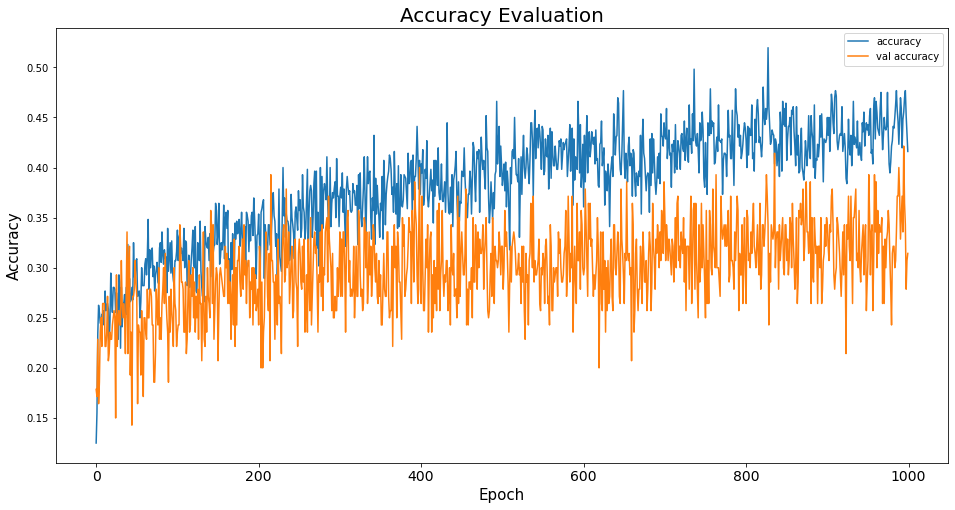

In [140]:
fig, ax = plt.subplots(figsize=(16, 8));

plt.title('Accuracy Evaluation', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Epoch", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.plot(csv_history.history['categorical_accuracy']);
plt.plot(csv_history.history['val_categorical_accuracy'])
plt.legend(labels=['accuracy', 'val accuracy']);
#plt.sa('acc eval.png')

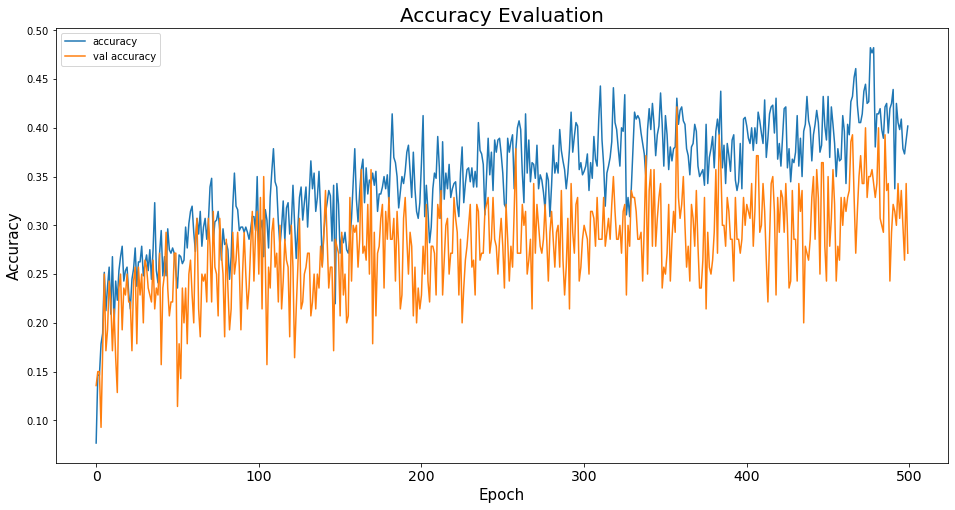

In [189]:
fig, ax = plt.subplots(figsize=(16, 8));

plt.title('Accuracy Evaluation', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Epoch", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.plot(csv_history1.history['categorical_accuracy']);
plt.plot(csv_history1.history['val_categorical_accuracy'])
plt.legend(labels=['accuracy', 'val accuracy']);
plt.savefig('csv acc eval.png')

In [190]:
dense_base.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 58)                0         
                                                                 
 dense_86 (Dense)            (None, 128)               7552      
                                                                 
 dense_87 (Dense)            (None, 64)                8256      
                                                                 
 dense_88 (Dense)            (None, 10)                650       
                                                                 
Total params: 16,458
Trainable params: 16,458
Non-trainable params: 0
_________________________________________________________________
